In [3]:
import sidechainnet as scn
from sidechainnet.utils.minimizer import SCNMinimizer
import torch
import numpy as np
torch.set_printoptions(precision=6, sci_mode=False)

Starting minimization...
   LR = 1
Starting loss = 32203.69
Epoch 0:	32203.69
Updated best angles.
Epoch 1:	23115.13
Updated best angles.
Epoch 2:	18928.85
Updated best angles.
Epoch 3:	16339.92
Updated best angles.
Epoch 4:	14590.07
Updated best angles.
Epoch 5:	13420.55
Updated best angles.
Epoch 6:	12506.66
Updated best angles.
Epoch 7:	11931.38
Updated best angles.
Epoch 8:	11343.06
Updated best angles.
Epoch 9:	10998.25
Updated best angles.
Epoch 10:	10598.60
Updated best angles.
Epoch 11:	10378.54
Updated best angles.
Epoch 12:	10079.47
Updated best angles.
Epoch 13:	9932.58
Updated best angles.
Epoch 14:	9679.09
Updated best angles.
Epoch 15:	9533.16
Updated best angles.
Epoch 16:	9311.27
Updated best angles.
Epoch 17:	9169.30
Updated best angles.
Epoch 18:	8967.63
Updated best angles.
Epoch 19:	8826.59
Updated best angles.
Epoch 20:	8643.31
Updated best angles.
Epoch 21:	8501.93
Updated best angles.
Epoch 22:	8333.57
Updated best angles.
Epoch 23:	8190.93
Updated best angles.
E

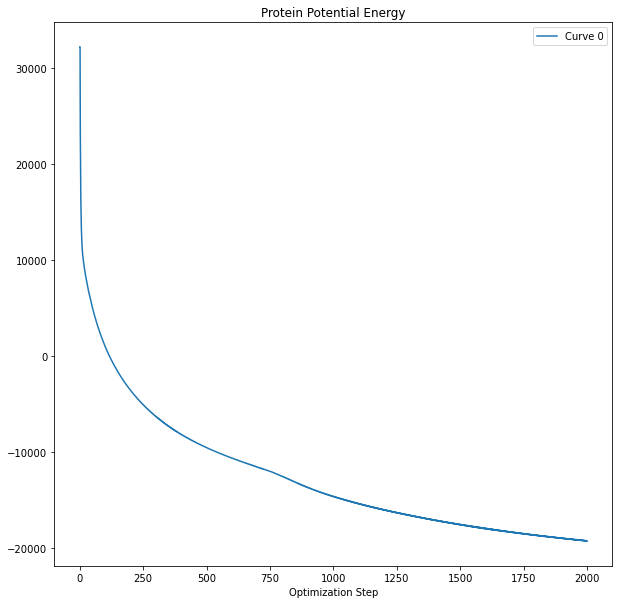

In [4]:
m = SCNMinimizer({}, verbose=True)

p_original = scn.SCNProtein.from_pkl("4U6F_51_M5.pkl")
p_original.torch()
p_original.fastbuild(add_hydrogens=True, inplace=True)
p_original.numpy()

p = m.minimize_scnprotein(p_original.copy(),
                      optimizer="sgd",
                      starting_lr=1,
                      max_iter=20,
                      epochs=2000,
                      lr_decay=True,
                      max_eval=5,
                      patience=3,
                      path=f"./{p_original.id}.pkl",
                      record_structure_every_n=None,
                      suffix="s")
diff_angles = (p.angles - p_original.angles).reshape(-1, 3)
print("Mean angle difference =", diff_angles[~np.isnan(diff_angles)].mean())


In [5]:
p_original.to_3Dmol(other_protein=p)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol